In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [66]:
ogDf = pd.read_csv("Data/Data Cleaning and Feature Eng/recent-grads-new-features.csv")
ogDf.head()

,Unnamed: 0,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Median_category,Num_majors,Percent_sample_size,Percent_employed,Percent_unemployed,Percent_college,Percent_non_college,Percent_low_wage,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,Major_category_Business,Major_category_Communications & Journalism,Major_category_Computers & Mathematics,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,NaN,29.0,0.015391,0.844805,0.015819,0.655836,0.155622,0.082514,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,NaN,29.0,0.009259,0.846561,0.112434,0.462963,0.339947,0.066138,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,NaN,29.0,0.003505,0.757009,0.018692,0.532710,0.205607,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,NaN,29.0,0.012719,0.602544,0.031797,0.420509,0.081081,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,NaN,29.0,0.008958,0.796466,0.051829,0.567700,0.137632,0.030130,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [90]:
# K-Means Clustering on Numeric Features
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
X = cleanDf[cols].values
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


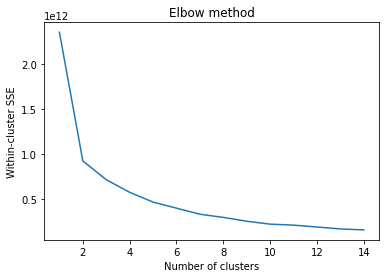

In [72]:
# Determine optimal cluster size using elbow method
distortions = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    distortions[k] = kmeans.inertia_

plt.plot(list(distortions.keys()),list(distortions.values()))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

In [86]:
# Create Output Dataframe with K-Means Classifications
outputDf = cleanDf
outputDf['Clustering'] = kmeans.labels_

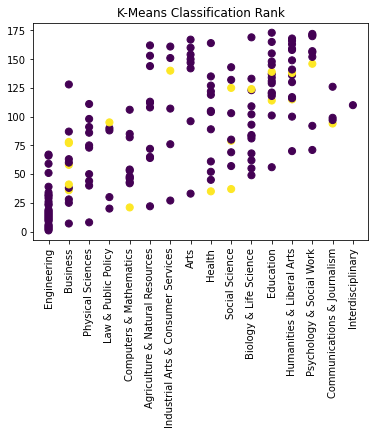

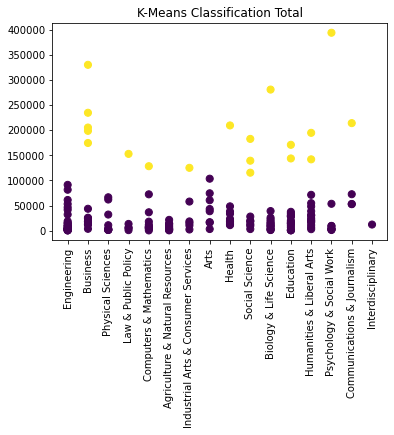

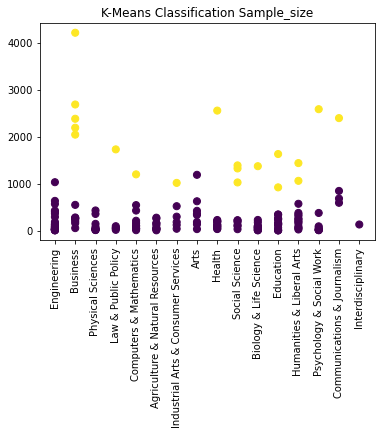

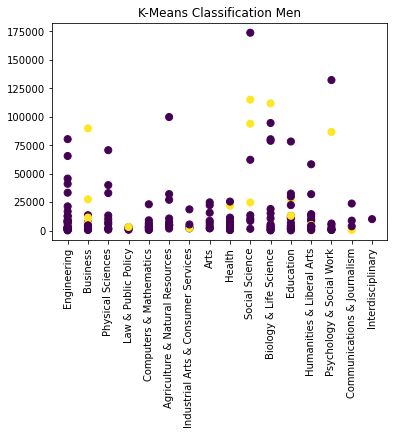

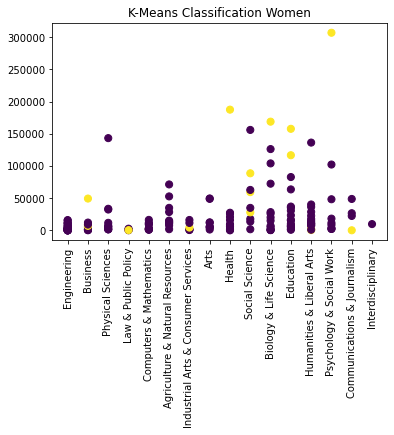

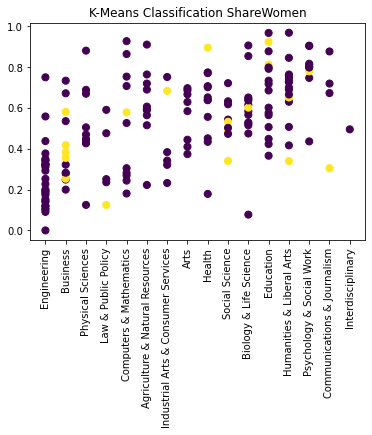

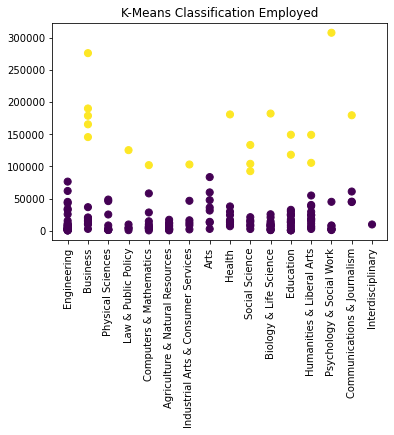

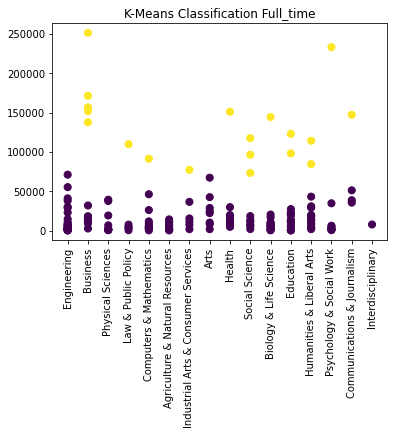

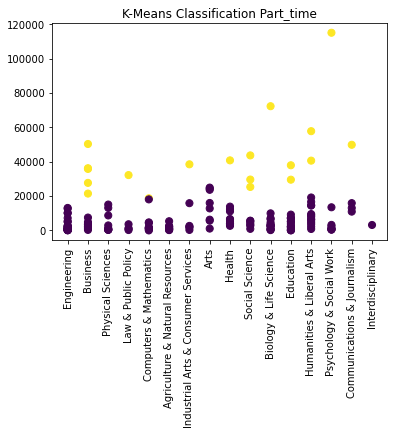

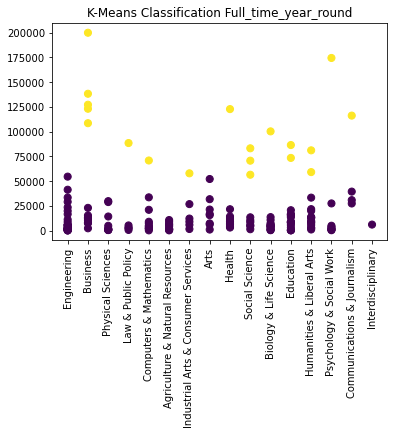

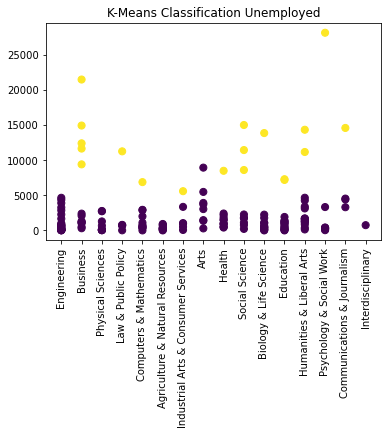

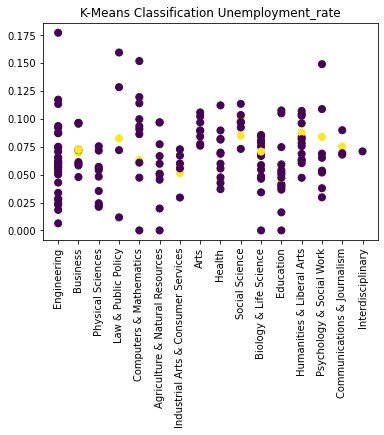

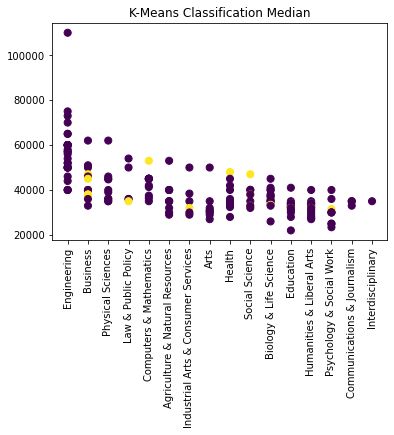

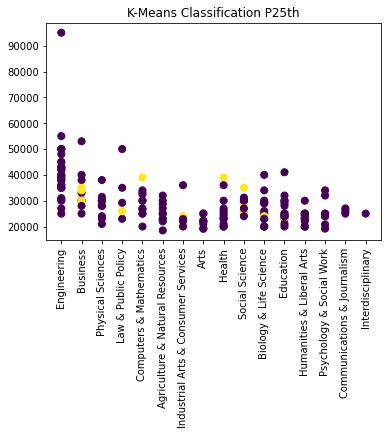

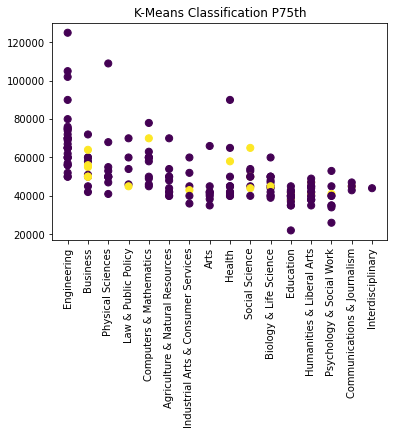

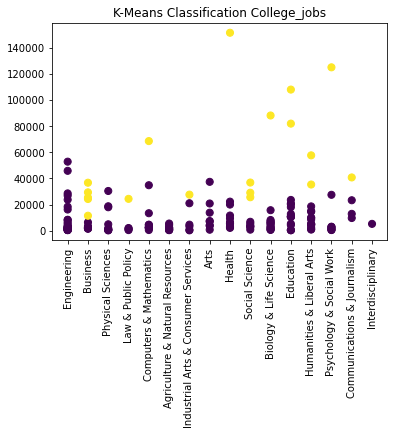

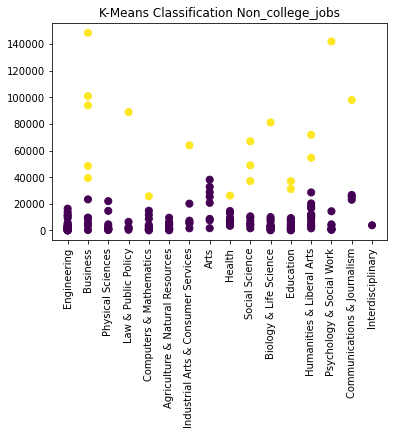

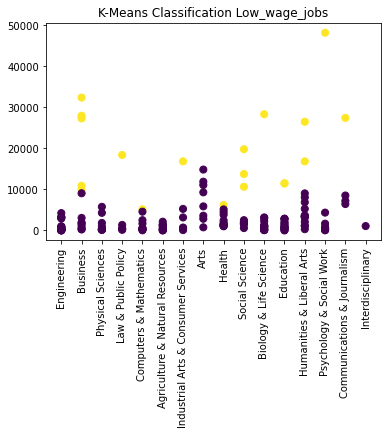

In [98]:
# Compare Major_category to each clustering feature
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
for x in cols:
    plt.figure()
    plt.scatter(x=outputDf.Major_category, y=outputDf[x],c=outputDf.Clustering, s=50)
    plt.xticks(rotation=90)
    plt.title('K-Means Classification ' + x)
    plt.plot()

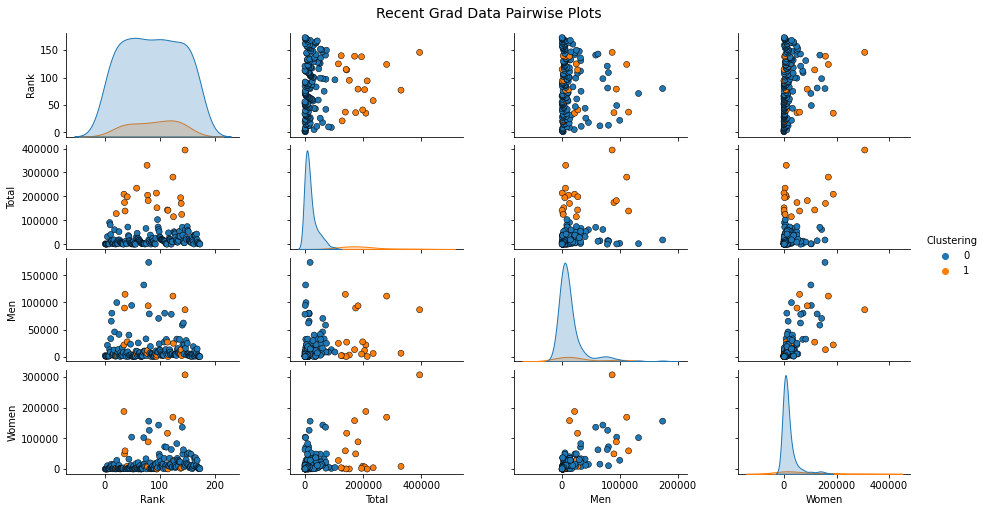

In [99]:
# Pairwise Plots for Clustering
cols = ['Rank','Total','Men','Women','Clustering']
pp = sns.pairplot(outputDf[cols], hue='Clustering', height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Recent Grad Data Pairwise Plots', fontsize=14)